In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [2]:
stardf = pd.read_csv("TG_stars.csv")
stardf.head (7)

,Vmag,Plx,e_Plx,B-V,Amag,TargetClass
0,9.10,3.54,1.39,0.482,16.845016,3
1,9.27,21.90,3.10,0.999,20.972221,5
2,6.61,2.81,0.63,-0.019,13.853532,1
3,8.06,7.75,0.97,0.370,17.506509,3
4,8.55,2.87,1.11,0.902,15.839409,4
5,12.31,18.80,4.99,1.336,23.680789,6
6,9.64,17.74,1.30,0.740,20.884768,4


In [3]:
stars_df_features = stardf.copy()

stars_df_features['Amag_SQ'] = stars_df_features['Amag']**2
stars_df_features['Vmag_SQ'] = stars_df_features['Vmag']**2
stars_df_features['B-V_SQ'] = stars_df_features['B-V']**2
stars_df_features['Plx_SQ'] = stars_df_features['Plx']**2


stars_df_features.head()

,Vmag,Plx,e_Plx,B-V,Amag,TargetClass,Amag_SQ,Vmag_SQ,B-V_SQ,Plx_SQ
0,9.10,3.54,1.39,0.482,16.845016,3,283.754574,82.8100,0.232324,12.5316
1,9.27,21.90,3.10,0.999,20.972221,5,439.834036,85.9329,0.998001,479.6100
2,6.61,2.81,0.63,-0.019,13.853532,1,191.920338,43.6921,0.000361,7.8961
3,8.06,7.75,0.97,0.370,17.506509,3,306.477840,64.9636,0.136900,60.0625
4,8.55,2.87,1.11,0.902,15.839409,4,250.886893,73.1025,0.813604,8.2369


In [4]:
stars_df_features.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96707 entries, 0 to 96706
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Vmag         96707 non-null  float64
 1   Plx          96707 non-null  float64
 2   e_Plx        96707 non-null  float64
 3   B-V          96707 non-null  float64
 4   Amag         96707 non-null  float64
 5   TargetClass  96707 non-null  int64  
 6   Amag_SQ      96707 non-null  float64
 7   Vmag_SQ      96707 non-null  float64
 8   B-V_SQ       96707 non-null  float64
 9   Plx_SQ       96707 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 7.4 MB


C:\Users\Helen\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TargetClass', ylabel='count'>

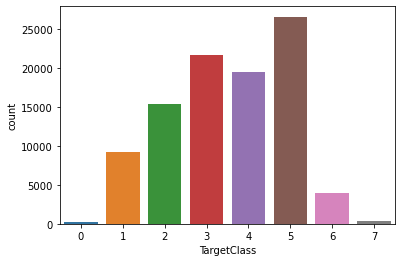

In [5]:
import matplotlib.pyplot as plt # plot graphs
import seaborn as sns # plot graphs

sns.countplot(stardf['TargetClass'])

In [6]:
#if 0 and 7 are so low, can we drop?

In [7]:
stars_df_features = stars_df_features[stardf.TargetClass != 0]
stars_df_features = stars_df_features[stardf.TargetClass != 7]

C:\Users\Helen\AppData\Local\Temp\ipykernel_5460\3647821025.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  stars_df_features = stars_df_features[stardf.TargetClass != 7]


In [9]:
stars_df_features

,Vmag,Plx,e_Plx,B-V,Amag,TargetClass,Amag_SQ,Vmag_SQ,B-V_SQ,Plx_SQ
0,9.10,3.54,1.39,0.482,16.845016,3,283.754574,82.8100,0.232324,12.5316
1,9.27,21.90,3.10,0.999,20.972221,5,439.834036,85.9329,0.998001,479.6100
2,6.61,2.81,0.63,-0.019,13.853532,1,191.920338,43.6921,0.000361,7.8961
3,8.06,7.75,0.97,0.370,17.506509,3,306.477840,64.9636,0.136900,60.0625
4,8.55,2.87,1.11,0.902,15.839409,4,250.886893,73.1025,0.813604,8.2369
...,...,...,...,...,...,...,...,...,...,...
96702,7.92,3.93,1.24,0.133,15.891963,2,252.554480,62.7264,0.017689,15.4449
96703,8.72,3.07,0.87,0.097,16.155692,1,261.006380,76.0384,0.009409,9.4249
96704,8.08,1.07,0.68,1.094,13.226919,4,174.951383,65.2864,1.196836,1.1449
96705,6.98,2.97,0.76,-0.143,14.343782,1,205.744089,48.7204,0.020449,8.8209


In [16]:
stars_df_features = stars_df_features.reset_index(drop=True)
stars_df_features

,Vmag,Plx,e_Plx,B-V,Amag,TargetClass,Amag_SQ,Vmag_SQ,B-V_SQ,Plx_SQ
0,9.10,3.54,1.39,0.482,16.845016,3,283.754574,82.8100,0.232324,12.5316
1,9.27,21.90,3.10,0.999,20.972221,5,439.834036,85.9329,0.998001,479.6100
2,6.61,2.81,0.63,-0.019,13.853532,1,191.920338,43.6921,0.000361,7.8961
3,8.06,7.75,0.97,0.370,17.506509,3,306.477840,64.9636,0.136900,60.0625
4,8.55,2.87,1.11,0.902,15.839409,4,250.886893,73.1025,0.813604,8.2369
...,...,...,...,...,...,...,...,...,...,...
96154,7.92,3.93,1.24,0.133,15.891963,2,252.554480,62.7264,0.017689,15.4449
96155,8.72,3.07,0.87,0.097,16.155692,1,261.006380,76.0384,0.009409,9.4249
96156,8.08,1.07,0.68,1.094,13.226919,4,174.951383,65.2864,1.196836,1.1449
96157,6.98,2.97,0.76,-0.143,14.343782,1,205.744089,48.7204,0.020449,8.8209


In [17]:
from sklearn.utils import resample

In [18]:
df_one = stars_df_features[stars_df_features.TargetClass == 1]
df_two = stars_df_features[stars_df_features.TargetClass == 2]
df_three = stars_df_features[stars_df_features.TargetClass == 3]
df_four = stars_df_features[stars_df_features.TargetClass == 4]
df_five = stars_df_features[stars_df_features.TargetClass == 5]
df_six = stars_df_features[stars_df_features.TargetClass == 6]

In [19]:
num_of_one = df_one.shape[0]
num_of_two = df_two.shape[0]
num_of_three = df_three.shape[0]
num_of_four = df_four.shape[0]
num_of_five = df_five.shape[0]
num_of_six = df_six.shape[0]
print("1:",num_of_one)
print("2 :",num_of_two)
print("3 :",num_of_three)
print("4 :",num_of_four)
print("5 :",num_of_five)
print("6 :",num_of_six)

1: 9144
2 : 15352
3 : 21672
4 : 19497
5 : 26544
6 : 3950


# Trying out upsampling

In [23]:
df_one_upsampled = resample(df_one, 
                                 replace=True,    
                                 n_samples=num_of_two,    
                                 random_state=1) 
df_three_downsampled = resample(df_three, 
                                 replace=False,    
                                 n_samples=num_of_two,     
                                 random_state=1) 
df_four_upsampled = resample(df_four, 
                                 replace=True,    
                                 n_samples=num_of_two,     
                                 random_state=1) 
df_five_downsampled = resample(df_five, 
                                 replace=False,    
                                 n_samples=num_of_two,     
                                 random_state=1) 
df_six_upsampled = resample(df_six, 
                                 replace=True,    
                                 n_samples=num_of_two,     
                                 random_state=1) 

 
# Combine minority class with downsampled majority class
#df_downsampled = pd.concat([df_giants_downsampled, df_dwarfs])

In [25]:
# Combine minority class with downsampled majority class
stardf_resampled1 = pd.concat([df_one_upsampled, df_two])
stardf_resampled2 = pd.concat([stardf_resampled1, df_three_downsampled])
stardf_resampled3 = pd.concat([stardf_resampled2, df_four_upsampled])
stardf_resampled4 = pd.concat([stardf_resampled3, df_five_downsampled])
stardf_resampled = pd.concat([stardf_resampled4, df_six_upsampled])

In [26]:
stardf_resampled

,Vmag,Plx,e_Plx,B-V,Amag,TargetClass,Amag_SQ,Vmag_SQ,B-V_SQ,Plx_SQ
3875,6.22,2.84,0.69,0.032,13.486592,1,181.888156,38.6884,0.001024,8.0656
49338,7.61,1.24,0.64,0.259,13.077108,1,171.010765,57.9121,0.067081,1.5376
14784,8.11,0.55,1.25,0.197,11.811813,1,139.518937,65.7721,0.038809,0.3025
85675,7.23,0.05,0.96,0.010,5.724850,1,32.773908,52.2729,0.000100,0.0025
31789,7.71,1.22,0.96,-0.200,13.141799,1,172.706885,59.4441,0.040000,1.4884
...,...,...,...,...,...,...,...,...,...,...
85073,7.65,4.22,1.10,1.642,15.776562,6,248.899917,58.5225,2.696164,17.8084
2287,9.41,5.09,1.41,1.747,17.943589,6,321.972383,88.5481,3.052009,25.9081
58530,6.86,1.56,0.86,1.630,12.825623,6,164.496605,47.0596,2.656900,2.4336
71435,10.74,-0.83,4.05,1.500,15.335390,6,235.174201,115.3476,2.250000,0.6889


In [27]:
stardf_resampled['TargetClass'].value_counts()

1    15352
2    15352
3    15352
4    15352
5    15352
6    15352
Name: TargetClass, dtype: int64

In [46]:
X = stars_df_features.drop('TargetClass', axis=1, inplace=False)
Y = stars_df_features['TargetClass']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20, random_state=21, stratify=Y)

In [47]:
Y_test.value_counts()

5    5309
3    4335
4    3899
2    3070
1    1829
6     790
Name: TargetClass, dtype: int64

In [48]:
import warnings
warnings.filterwarnings("ignore")

In [49]:
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [50]:

clf =RandomForestClassifier(n_estimators=200, max_features="log2", max_depth=13).fit(X_train_scaled, Y_train)

y_pred=clf.predict(X_test_scaled)

print(f'RFC Training Data : {clf.score(X_train_scaled,Y_train)}')
print(f'RFC Testing Data: {clf.score(X_test_scaled,Y_test)}')

RFC Training Data : 0.8390812068584502
RFC Testing Data: 0.762115224625624


In [51]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, Y_train)
y_pred = gnb.predict(X_test)
print(f'GNB Training Data : {gnb.score(X_train_scaled,Y_train)}')
print(f'GNB Testing Data: {gnb.score(X_test_scaled,Y_test)}')

GNB Training Data : 0.13480312504062292
GNB Testing Data: 0.13441139767054908


In [32]:
feature_importances = clf.feature_importances_

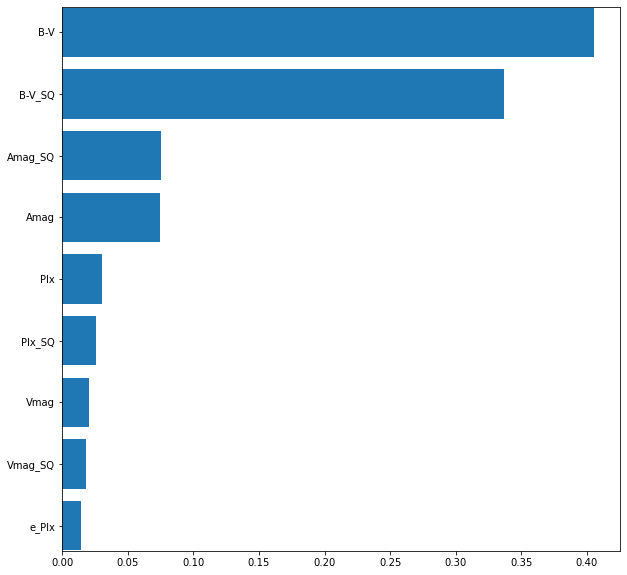

In [33]:
features = sorted(zip(X.columns, clf.feature_importances_), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]

fig, ax = plt.subplots()

fig.set_size_inches(10,10)
plt.margins(y=0.001)

ax.barh(y=cols, width=width)

plt.show()

In [34]:
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(clf)
sel.fit(X_train_scaled, Y_train)

SelectFromModel(estimator=RandomForestClassifier(max_depth=10,
                                                 max_features='log2',
                                                 n_estimators=200))

In [35]:
X_selected_train, X_selected_test, Y_train, Y_test = train_test_split(sel.transform(X), Y)
scaler = StandardScaler().fit(X_selected_train)
X_selected_train_scaled = scaler.transform(X_selected_train)
X_selected_test_scaled = scaler.transform(X_selected_test)

In [36]:
clf = LogisticRegression()
clf.fit(X_selected_train_scaled, Y_train)
print(f'Training Score: {clf.score(X_selected_train_scaled, Y_train)}')
print(f'Testing Score: {clf.score(X_selected_test_scaled, Y_test)}')

Training Score: 0.7080655433964449
Testing Score: 0.7107868681605003
